In [59]:
import pandas as pd

In [60]:
import sys
sys.path.append('../scripts')


## Merge the features

In [61]:
logo_df = pd.read_csv('../data/logo_position.csv')
eng_df = pd.read_csv('../data/engagement_txt_position.csv')
cta_df = pd.read_csv('../data/cta_txt_position.csv')
obj_df = pd.read_csv('../data/object_detected.csv')

obj_df.rename(columns={'0':'id'},inplace=True)

df = logo_df.merge(eng_df,on='id')
df = df.merge(cta_df,on='id')
df = df.merge(obj_df,on='id')
df.shape

(905, 519)

## Read the performance file

In [1]:
pf_df = pd.read_csv('../data/Challenge_Data/performance_data.csv')
pf_df.rename(columns={'game_id':'id'},inplace=True)
pf_df.head()

## merge pf with the feature

In [63]:
df = df.merge(pf_df,on='id')
df.shape

(905, 522)

## PCA Dimensionality reduction

In [64]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [79]:
data = df.drop(['id','preview_link','ER','CTR'],axis=1)
columns = data.columns.to_list()
data.shape

(905, 518)

In [81]:

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(data)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,0.601522,1.642690,0.575014,2.387473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,0.126544,0.970586,0.242229,0.544495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.675930,2.368006,1.801859,1.460865,1.065088,-0.203525,7.488704,1.997412,6.062278,0.827210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,0.126544,0.970586,0.242229,0.544495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,0.249687,1.371981,0.419714,0.963233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,0.126544,0.970586,0.242229,0.544495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
901,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,-0.427597,-0.803024,-0.593433,-0.773060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,0.087392,0.159022,0.253542,0.151155,0.385982,0.091930,-0.427597,-0.803024,-0.593433,-0.773060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
903,-0.270030,-0.422986,-0.371886,-0.407655,-0.340504,-0.255665,-0.427597,-0.803024,-0.593433,-0.773060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

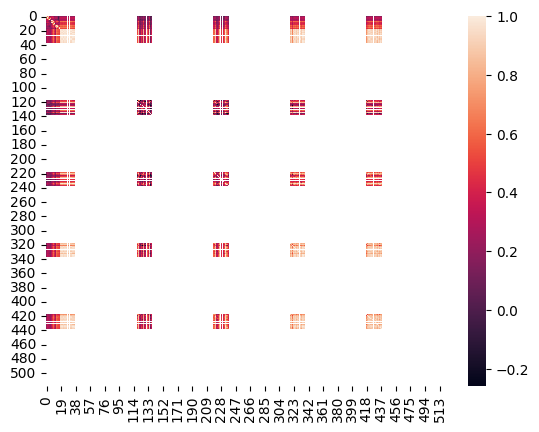

In [82]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())


In [83]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 256)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,5.966597,-0.875527,4.228910,1.227844,-5.080250,4.705445,0.060572,3.051015,-0.175810,3.127903,...,-3.598065e-31,8.382337e-32,3.704310e-31,2.941808e-31,8.698547e-31,-8.986015e-33,9.681507e-32,9.671273e-32,3.972531e-32,1.305191e-31
1,6.199574,-0.208893,1.033639,0.443246,-3.230872,2.281240,0.817452,1.537422,-0.728240,-0.246637,...,-3.816257e-31,2.768445e-31,2.147750e-31,4.061983e-31,1.054947e-30,9.702705e-32,2.489351e-31,-4.212772e-32,5.718141e-32,5.638410e-33
2,4.808152,-1.228349,9.675247,0.373994,-5.530096,4.320427,0.266141,0.484820,3.642968,0.824212,...,-1.783311e-31,8.684362e-32,3.641521e-31,2.873673e-31,9.497874e-31,2.269051e-32,3.571017e-32,1.507880e-31,1.479482e-32,6.357522e-32
3,6.296626,-0.031434,1.123966,0.403817,-3.274790,2.300532,0.810319,1.454204,-0.703022,-0.199442,...,-3.755464e-31,2.840589e-31,2.162406e-31,4.722566e-31,1.150084e-30,1.459500e-31,2.847329e-31,-9.573101e-32,6.409863e-32,-1.038049e-32
4,3.957764,-0.033983,1.143082,0.301815,-4.055218,2.380942,1.536560,1.216737,-1.139426,-0.577287,...,-4.206325e-31,1.786310e-31,2.704146e-31,2.878674e-31,9.302627e-31,6.748744e-33,1.187104e-31,3.532113e-32,-1.003240e-32,5.644234e-32


<AxesSubplot: >

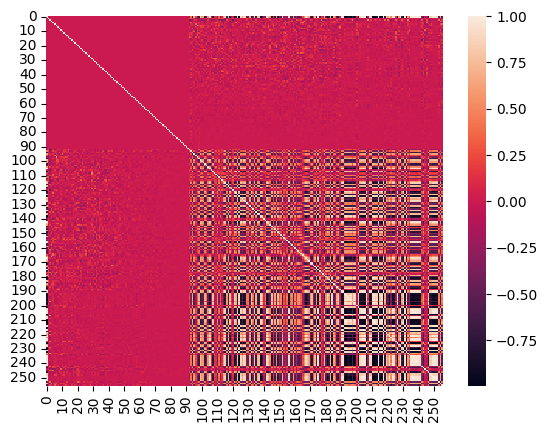

In [84]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


In [88]:
data_pca['id'] = df['id']
data_pca['ER'] = df['ER']
data_pca['CTR'] = df['CTR']
print(data_pca.shape)
data_pca.to_csv('../data/selected_numeric_feature.csv',index=False)

(905, 259)
